# Is 1% interest every trade a possibility?

This analysis aims to explore the feasibility of daily stock traders consistently achieving a 1% profit on each trade for a year. We will focus on Zomato stock and calculate the effective annual interest rate achievable, taking into account both buyers and sellers. Our analysis will be continuously updated and refined based on the results obtained for each group. <br>
### The Reason for me to select Zomato for Analysis is: <br>
* **High liquidity:** Zomato is one of the most liquid stocks on the Indian stock exchange, making it suitable for daily trading due to its tight bid-ask spreads and high trading volume.<br>
* **Volatility:** The stock has experienced significant volatility in recent years, offering potential opportunities for both buyers and sellers to capitalize on price movements.<br>
* **Recent profitability:** After years of losses, Zomato reported its first quarterly profit in Q3 FY24, potentially attracting more investors and increasing trading activity.<br>
* **Growth potential:** The online food delivery market in India is expected to continue growing rapidly, potentially benefiting Zomato as a major player in the space.<br>
* **Availability of data:** Zomato's stock price and trading data are readily available, making it easier to conduct an in-depth analysis.<br>

### Assumptions for Zomato Stock Trading Analysis: <br>
**1. Data Period:** January 1, 2023, to December 31, 2023 (one year)<br>

**2. Data Source:** Official data from NSE website<br>

**3. Analysis Variables:** Date, Open Price, Close Price, High Price, Low Price<br>

**4. Buyer/Seller Day Definition:**<br>
* **Buyer Day:** Open Price > Closing Price (significant buying pressure)<br>
* **Seller Day:** Open Price < Closing Price (significant selling pressure)<br>

**5. Price Movement Assumptions:**<br>
* **Buyer Call:** Price assumed to move from Day's Low to Day's High assuming that it is a Buyer Day<br>
* **Seller Call:** Price assumed to move from Day's High to Day's Low assuming that it is a Seller Day<br>

**6.Interest Rate Calculation:**<br>
* Based on daily price changes<br>
* Assumed to be compound interest<br>
* Effective annual interest rate will be calculated for the entire period<br>

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
Zomato = pd.read_csv("Zomato.csv")
Zomato.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Dec-2023,EQ,124.00,125.55,123.25,123.20,123.70,123.70,124.13,131.75,44.35,"2,75,12,604","3,41,51,94,738.70","1,33,273"
1,28-Dec-2023,EQ,124.90,125.50,120.60,127.05,123.20,123.20,123.19,131.75,44.35,"7,28,65,479","8,97,61,00,147.65","2,10,148"
2,27-Dec-2023,EQ,125.70,127.60,125.55,125.00,126.85,127.05,126.64,131.75,44.35,"2,17,57,560","2,75,54,01,886.25","77,925"
3,26-Dec-2023,EQ,128.50,128.70,124.30,128.50,124.50,125.00,126.30,131.75,44.35,"2,54,99,782","3,22,06,60,732.75","1,11,094"
4,22-Dec-2023,EQ,130.55,131.00,125.30,127.35,127.90,128.50,128.74,131.75,44.35,"6,31,13,800","8,12,51,01,537.65","1,87,775"


In [3]:
Data = Zomato.loc[:,['Date ','OPEN ','HIGH ','LOW ','close ']]
Data['Date '] = pd.to_datetime(Data['Date '])
Data = Data.sort_values(by='Date ')
Data.head()

,Date,OPEN,HIGH,LOW,close
245,2023-01-02,60.65,60.70,59.80,60.30
244,2023-01-03,58.85,59.55,57.30,58.95
243,2023-01-04,58.40,58.70,56.00,56.35
242,2023-01-05,56.95,57.10,55.60,56.20
241,2023-01-06,56.20,56.40,54.95,55.25


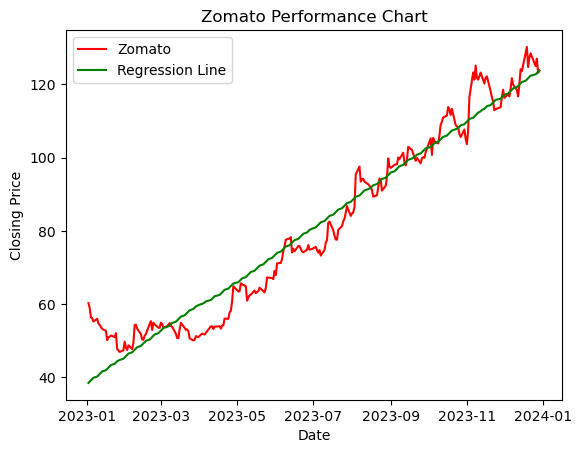

In [4]:
Days = range(0,246)
slope, intercept = np.polyfit(Days,Data['close '],1)
regression_line = intercept + (Days * slope)
plt.plot(Data['Date '],Data['close '],color = 'red',label = 'Zomato')
plt.plot(Data['Date '],regression_line,color = 'green',label = 'Regression Line')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Zomato Performance Chart')
plt.legend()
plt.show()

### Observation:
* **Time series data:** The data represents a sequence of values over time, making it time series data. <br>
* **Upward trend:** The overall trend in the graph appears to be upward, suggesting a general price increase over the observed period.<br>
* **Non-stationary:** As the data covers less than one fiscal year, it is likely non-stationary, meaning its statistical properties (e.g., mean, variance) might change over time.<br>
* **Cycles present:** The graph exhibits cyclical patterns, suggesting recurring fluctuations in price movements.<br>

In [5]:
Day_Percentage_Change = ((Data['close '] - Data['OPEN '])/Data['OPEN '])*100
Data['Day Percentage Change'] = Day_Percentage_Change
Data.head()

,Date,OPEN,HIGH,LOW,close,Day Percentage Change
245,2023-01-02,60.65,60.70,59.80,60.30,-0.577082
244,2023-01-03,58.85,59.55,57.30,58.95,0.169924
243,2023-01-04,58.40,58.70,56.00,56.35,-3.510274
242,2023-01-05,56.95,57.10,55.60,56.20,-1.316945
241,2023-01-06,56.20,56.40,54.95,55.25,-1.690391


In [6]:
Data["Call"] = np.where(Data["OPEN "] <= Data["close "], "Buyer", "Seller")
condition = [Data['Call'] == 'Buyer',Data['Call'] == 'Seller']
choice = [((Data['LOW '] - Data['HIGH '])/ Data['LOW '])*-100,((Data['HIGH '] - Data['LOW '])/ Data['HIGH '])*100]
Data['Change'] = np.select(condition, choice, default='Other')
Data.head()

,Date,OPEN,HIGH,LOW,close,Day Percentage Change,Call,Change
245,2023-01-02,60.65,60.70,59.80,60.30,-0.577082,Seller,1.482701812191113
244,2023-01-03,58.85,59.55,57.30,58.95,0.169924,Buyer,3.926701570680628
243,2023-01-04,58.40,58.70,56.00,56.35,-3.510274,Seller,4.5996592844974495
242,2023-01-05,56.95,57.10,55.60,56.20,-1.316945,Seller,2.626970227670753
241,2023-01-06,56.20,56.40,54.95,55.25,-1.690391,Seller,2.5709219858155956


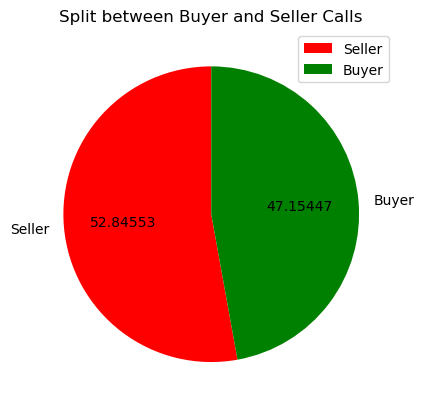

In [7]:
Count = Data['Call'].value_counts()
plt.pie(Count,colors=('red','green'),labels=('Seller','Buyer'),autopct='%1.5f',startangle=90)   
plt.title("Split between Buyer and Seller Calls")
plt.legend()
plt.show()

### Observation: <br>
In 2023, there were a nearly equal number of buying and selling days for Zomato stock, with 47.15% classified as buying days and 52.85% classified as selling days. This suggests a relatively balanced market sentiment over the year, with neither buyers nor sellers consistently dominating the market. Although there were slightly more selling days than buying days, the difference is only 5.7 percentage points. This indicates that the market sentiment for Zomato stock in 2023 was fairly neutral, with with weak bias towards selling over buying pressure.

In [8]:
Buyer_data = Data[Data['Call'] == 'Buyer']
Buyer_change = Buyer_data['Change'].astype(float)
Sum_change = Buyer_change.sum()
Buyer_Interest = Sum_change/246
print("Average Buyer Change:",Buyer_Interest,"%")

Average Buyer Change: 1.881634656661503 %


In [9]:
Seller_data = Data[Data['Call'] == 'Seller']
Seller_change = Seller_data['Change'].astype(float)
Sum_Change = Seller_change.sum()
Seller_Interest = Sum_Change/246
print("Average Seller Change:", Seller_Interest,"%")

Average Seller Change: 1.9124562706884145 %


### Observation:<br>
Assuming 100% accurate trader calls and the given average buyer and seller changes (1.8816% and 1.9124%, respectively), achieving a 1% daily return on your investment would have been theoretically possible over the considered period. But, in practical it's not possible for a person to be 100% accurate for all the calls. Hence, we need to have a indepth research for more accurate calls during trading hours.


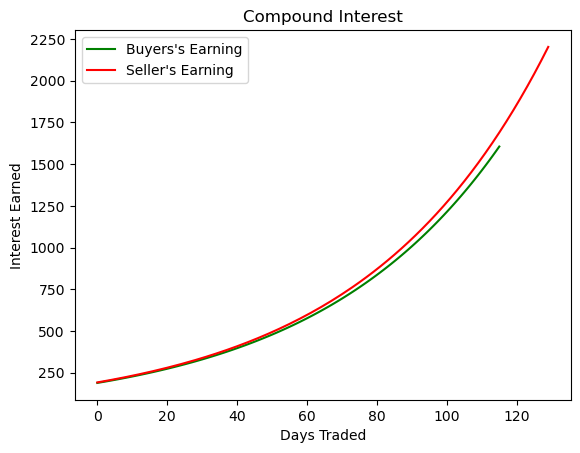

In [10]:
Investment = 10000
Total_Days = 246
Buyer_day = round((246*47.2)/100)
Seller_day = round((246*52.8)/100)

def compound_interest(initial_investment, num_days, interest_rate):
    interest_rate = interest_rate / 100
    interest = []
    investment = initial_investment
    for day in range(0,num_days):
        interest_earned = investment * interest_rate
        interest.append(interest_earned)
        investment += interest_earned
    return interest

B_Earnings = compound_interest(Investment,Buyer_day,Buyer_Interest)
S_Earnings = compound_interest(Investment,Seller_day,Seller_Interest)

np.arange(0,250)
plt.plot(B_Earnings, color = "Green",label = "Buyers's Earning")
plt.plot(S_Earnings,color = "Red",label = "Seller's Earning")
plt.title("Compound Interest")
plt.xlabel("Days Traded")
plt.ylabel("Interest Earned")
plt.legend()
plt.show()

### Observation:
The line plot demonstrates the compounded growth of an initial investment of ₹10,000 at two changes: 1.8816% and 1.9125%. Both lines exhibit an upward trend, indicating that the traders are able to grow over time due to compounding interest. The line with the seller change of 1.9125% shows a steeper incline compared to the line with buyer chnage of  1.8816% change. This suggests that a slightly higher seller change that could lead to a more significant in the investment's value over time.

In [11]:
def Effective_Interest_Rate(interest,duration):
    EFF_Interest = (1-interest/duration)**(duration-1)
    return EFF_Interest*100

Expected_Interest = (Buyer_day*Buyer_Interest + Seller_day*Seller_Interest)/Total_Days

print("The Effective Interest Rate for Seller: ",Effective_Interest_Rate(Seller_Interest,Seller_day))
print("The Effective Interest Rate for Buyers: ",Effective_Interest_Rate(Buyer_Interest,Buyer_day))
print("Expected Interest Rate Overall: ",Effective_Interest_Rate(Expected_Interest,Total_Days))

The Effective Interest Rate for Seller:  14.780779144748852
The Effective Interest Rate for Buyers:  15.24820002397625
Expected Interest Rate Overall:  14.993750706308544


### Observation: <br>
The analysis reveals that sellers earned a slightly lower effective interest rate of 14.78% compared to buyers who achieved a 15.25% effective interest rate over the considered period. This suggests that, on average, buyers slightly outperformed sellers in terms of daily returns.

In [12]:
Investment_return = ((123.7 - 60.65)/60.65)*100
print("If the amount had been invested order for one year was placed on 2nd Jan 2023 @ 60.65 per unit then sold on 29th Dec 2023 @123.7 per unit then the return would be ",Investment_return," %")
print("An investment of ₹10,000 would have grown to ₹",10000+10000*(103.95713107996703/100))

If the amount had been invested order for one year was placed on 2nd Jan 2023 @ 60.65 per unit then sold on 29th Dec 2023 @123.7 per unit then the return would be  103.95713107996703  %
An investment of ₹10,000 would have grown to ₹ 20395.7131079967


## Conclusion:<br>
Achieving a 1% daily return consistently is highly unlikely, especially in traditional investment strategies. The key takeaway is that the potential for higher returns often comes with increased risk. In-depth analysis and sound risk management are crucial for any trading strategy, regardless of the targeted return. Aiming for consistent daily returns can lead to excessive risk-taking and emotional trading decisions. It's important to focus on developing a sound trading process based on research, risk management, and discipline, and letting the results follow. The information presented should not be considered financial advice, and it's essential to conduct your own research and due diligence before making any investment decisions.